In [1]:

from matplotlib import pyplot as plt
import time
from functools import wraps

Preguntas teóricas

1-) ¿Qué es un paradigma de programación?

R: Un paradigma de programación es una manera o estilo de programación de software. Se trata de un conjunto de métodos sistemáticos aplicables en todos los niveles del diseño de programas para resolver problemas computacionales. El paradigma guía la manera en la que se organiza y escribe el código en un lenguaje de programación. Define cómo los programadores estructuran su pensamiento al abordar problemas y diseñar soluciones en el código. Los paradigmas establecen reglas, estructuras y metodologías específicas que guían el proceso de desarrollo de software.
Existen varios tipos como: Paradigma Imperativo, Funcional, Orientado a Objetos (OOP), Declarativo y Lógico.

2-) ¿En qué se basa la programación orientada a objetos?

R: La programación orientada a objetos(OOP en ingles), contempla un metodo para organizar programas modulares, representando abstracción de datos, agrupación de información y comportamientos relacionados. La OOP se basa en la utilización de objetos y clases y es adecuada para crear aplicaciones triviales y complejas, permite reutilizar el código, aumentando la productividad y eficiencia, se pueden incorporar facilmente nuevas funciones al código existente y reduce los costes de producción y mantenimiento.

3-) ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big 𝑂?

R: Tanto la recursión como la iteración se usan para ejecutar algunas instrucciones repetidamente hasta que alguna condición sea verdadera. Pero existe una diferencia importante entre ambas, primero conoceremos el concepto de recursividad. Recursividad se refiere a una situación en la que una función se llama a sí misma una y otra vez e Iteración permite repetir una sentencias o conjunto de ellas.

La recursividad se usa para realizar algoritmos cortos y elegantes con menos código, mientras que la iteración presentan la habitual forma de uno o varios bucles y tanto la recursividad como la iteración pueden tener diferentes complejidades de tiempo y espacio, que se expresan mediante Big-O.

4-) Explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)

R: La diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛) radica en cómo aumenta el tiempo de ejecución o el uso de recursos (como la memoria) en función del tamaño de la entrada 𝑛.
Para 𝑂(1) significa que el tiempo de ejecución es constante, independiente del tamaño de la entrada, por otro lado 𝑂(𝑛) significa que el tiempo de ejecución crece linealmente con el tamaño de la entrada(proporcional). Por lo anterior los algoritmos 𝑂(1) son más eficientes que los 𝑂(𝑛).


5-) ¿Cómo se calcula el orden en un programa que funciona por etapas?

R: Para calcular el orden del programa hay que analizar cada etapa por separado y luego combinarlos para obtener la complejidad general.

Para etapas donde la operación no dependa del tamaño de la entrada, su orden será 𝑂(1). 

Para bucles o ciclos(for por ejemplo) el orden será 𝑂(𝑛), con 𝑛 el numero de veces que se ejecuta, si los ciclos no estan anidados(secuenciales), se sumarán los ordenes de las etapas, ejemplo: etapa 1 orden 𝑂(𝑛), etapa 2 orden 𝑂(𝑛), total = 𝑂(2𝑛), sin embargo en notacion Big-O las constantes se ignoran por lo que el orden total sería 𝑂(𝑛).

Para ciclos anidados(como un ciclo for dentro de otro ciclo for), la complejidad total será el producto el orden de cada sub-etapa, ejemplo: etapa 1 orden 𝑂(𝑛), sub-etapa orden 𝑂(𝑛), total= 𝑂(𝑛^2)

Si hay etapas recursivas, la complejidad se calcula con la relación de recurrencia que tengan las etapas, ejemplo: un arbol de busqueda binario tiene orden 𝑂(log(𝑛)) en cada etapa.

Finalmente el orden total del programa será el orden mayor que se haya encontrado en las etapas que lo compongan, dado que la notación Big-O se enfoca en en entradas de mayor tamaño y mas costosas, por lo que las demas etapas más pequeñas pueden ser ignoradas.

6-) ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?

R: Para esto hay que analizar como cambia el tamaño del problema tras cada recursión, como se mencionó en la pregunta anterior, esto se ve con las relaciones de recurrencia, siendo ecuaciones que describen el tiempo de ejecución en función del tamaño del problema(T(𝑛)).

Su forma general es la siguiente: T(𝑛) = a*T(𝑛/b) + 𝑂(f(𝑛)), siendo "a" el numero de subproblemas que contempla el problema original, 𝑛/b el tamaño de cada subproblema y f(𝑛) la función de costo del trabajo adicional.



Parte práctica:

In [11]:
#Definición del código sin decorador, luego se usa el mismo código cambiando el nombre de la clase :)
class PCBCaminosSindecorador:
    def __init__(self, N, M):
        self.N = N
        self.M = M

    #Solución 1: Cálculo con recursividad
    def caminos_recursivo(self, x=0, y=0):      #Recibe la posición en la grilla, partiendo en (0,0)       
        if x == self.N - 1 and y == self.M - 1: #Caso base, si llega a la posición B (N-1,M-1), significa que encontró un camino         
            return 1                            #Luego retorna 1, asegurando no seguir más alla en un camino imaginario alejandose de B      
        caminos = 0                             #Si no se ha llegado aún a B, entra la recursividad 
        if x < self.N - 1:                      #Si es posible moverse a la derecha, llama a la función sumando 1 en x
            caminos += self.caminos_recursivo(x + 1, y)
        if y < self.M - 1:                      #Si es posible moverse hacia abajo, llama ala función sumando 1 en y
            caminos += self.caminos_recursivo(x, y + 1)
        return caminos                          #Notar que no se puede devolver ya que al solo sumar 1 siempre avanza 
                                                #Tampoco está programado avanzar en diagonal, para esto faltaría un if sumando 1 a X y a Y
                                                #Finalmente se suma el número de caminos obtenidos en ambas direcciones.
    #Solución 2: Cálculo con Programación dinámica
    def caminos_dinamico(self):
        matriz = [[0] * self.M for _ in range(self.N)]  #Crea una matriz de ceros con el tamaño de la grilla, en cada celda matriz[i][j] se almacena la cantidad de caminos posibles de (0,0) a (i,j)
        for i in range(self.N):                         #Se utiliza for _ in range() porque como es solo un conteo no se va a utilizar la variable así que no interesa su valor
            for j in range(self.M):
                if i == 0 or j == 0: #Caso base, si se está en la primera fila o columna solo hay 1 camino posible para llegar a esa celda, moverse a la derecha o hacia abajo 
                    matriz[i][j] = 1
                else:                #Para otra que no esté en los bordes, la celda actual es la suma de los caminos de la celda de la izquierda y la de arriba
                    matriz[i][j] = matriz[i - 1][j] + matriz[i][j - 1]  
        return matriz[self.N - 1][self.M - 1] #El numero total de posibles caminos estará en la última celda


In [16]:
#Decorador, utilizado para medir el tiempo que se demora en ejecutar cada función 
def medir_tiempo(func):                     #Función que toma otra función como argumento
    @wraps(func)                            
    def wrapper(*args, **kwargs):  #Agrupador de funciones, recibe cualquier argumento posicional(*args) y cualquier argumento con nombre o "key Word"(**kwargs)
        start = time.time()        #Registra el tiempo de inicio
        resultado = func(*args, **kwargs) #Llama la función original para almacenar el resultado
        end = time.time()          #Registra el tiempo de finalización 
        #print(f"Tiempo de ejecución de {func.__name__}: {end - start} segundos") #"Printea" el calculo del tiempo de ejecución, podría solo almacenar los resultados sin "printear", consumiendo menos recursos, pero así es más demostrativo. 
        #Finalmente lo dejé con un # el print por que para varias grillas eran demasiados prints del tiempo de ejecución, pero se puede sacar el # para verlo, probando con menos grillas pequeñas.
        return resultado           #Devuelve el resultado final
    return wrapper                 #Al retornar la funcion wrapper, la función original cuenta con el decorador que medirá el tiempo.

#Para la función recursiva se va a llamar a la función de tiempo en cada iteración por lo que se "printearan" los tiempos de cada paso, 
#pero finalmente en el gráfico solo se considera el tiempo total,  por como funciona la recursividad habrán muchos tiempos 0 donde considera la revisión de los datos hacia atras

In [17]:
class PCBCaminos:              #Clase final, que integra las funciones del decorador     
    def __init__(self, N, M):
        self.N = N
        self.M = M

    @medir_tiempo                   #Aplicar el decorador para calcular el tiempo de ejecución de la función recursiva 
    def caminos_recursivo(self, x=0, y=0):    
        if x == self.N - 1 and y == self.M - 1:         
            return 1                                    
        caminos = 0
        if x < self.N - 1:
            caminos += self.caminos_recursivo(x + 1, y) 
        if y < self.M - 1:
            caminos += self.caminos_recursivo(x, y + 1)
        return caminos

    @medir_tiempo                   #Aplicar el decorador para calcular el tiempo de ejecución de la función de programación dinámica
    def caminos_dinamico(self):
        matriz = [[0] * self.M for _ in range(self.N)]
        for i in range(self.N):
            for j in range(self.M):
                if i == 0 or j == 0:
                    matriz[i][j] = 1
                else:
                    matriz[i][j] = matriz[i - 1][j] + matriz[i][j - 1]
        return matriz[self.N - 1][self.M - 1]
        


Calculando para una grilla de 4x3...

Solución recursiva para la grilla 4x3: 10 caminos
Solución dinámica para la grilla 4x3: 10 caminos

Calculando para una grilla de 5x5...

Solución recursiva para la grilla 5x5: 70 caminos
Solución dinámica para la grilla 5x5: 70 caminos

Calculando para una grilla de 8x9...

Solución recursiva para la grilla 8x9: 6435 caminos
Solución dinámica para la grilla 8x9: 6435 caminos

Calculando para una grilla de 3x7...

Solución recursiva para la grilla 3x7: 28 caminos
Solución dinámica para la grilla 3x7: 28 caminos

Calculando para una grilla de 8x5...

Solución recursiva para la grilla 8x5: 330 caminos
Solución dinámica para la grilla 8x5: 330 caminos

Calculando para una grilla de 10x10...

Solución recursiva para la grilla 10x10: 48620 caminos
Solución dinámica para la grilla 10x10: 48620 caminos

Calculando para una grilla de 4x5...

Solución recursiva para la grilla 4x5: 35 caminos
Solución dinámica para la grilla 4x5: 35 caminos


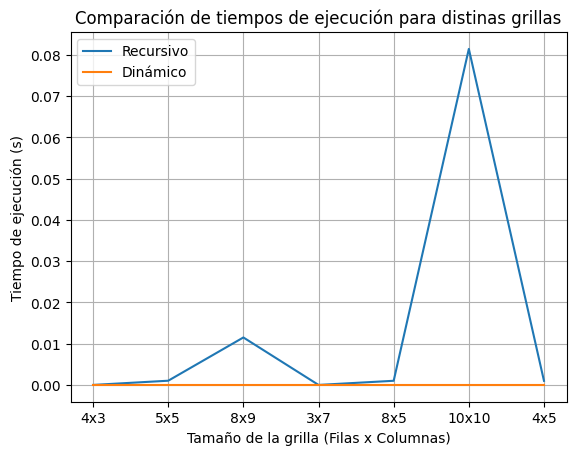

In [21]:
#Aquí se prueban las funciones, funciona para más de 6 grillas (punto 2), pero si se printean los tiempos de ejecución se sobrecarga la pantalla con prints por la sol. recursiva.
grillas = [(4,3), (5,5), (8,9), (3,7), (8,5), (10,10), (4,5)]  #Se crea una lista de diferentes grillas para comparar, pueden ser cuadradas o rectangulares, para probar otras basta con cambiar la lista
tiempos_recursivo = []    #Listas vacias para almacenar los tiempos
tiempos_dinamico = []

for filas, columnas in grillas:
    print(f"\nCalculando para una grilla de {filas}x{columnas}...\n")
    pcb = PCBCaminos(filas, columnas)                #Se llama a la clase con las dimensiones de las grillas y se almacena en una variable
    
    # Medir tiempo y caminos con la solución recursiva
    start = time.time()
    caminos_recursivos = pcb.caminos_recursivo()
    end = time.time()
    tiempos_recursivo.append(end - start)
    print(f"Solución recursiva para la grilla {filas}x{columnas}: {caminos_recursivos} caminos")

    # Medir tiempo y caminos con la solución de programación dinámica
    start = time.time()
    caminos_dinamicos = pcb.caminos_dinamico()
    end = time.time()
    tiempos_dinamico.append(end - start)
    print(f"Solución dinámica para la grilla {filas}x{columnas}: {caminos_dinamicos} caminos")

# Generar gráfico comparativo, se diseñó la función para comparar grillas, por lo que si solo se entrega una grilla no se generará un gráfico
def generar_grafico(grillas, tiempos_recursivo, tiempos_dinamico):
    etiquetas = [f"{filas}x{columnas}" for filas, columnas in grillas]
    
    plt.plot(etiquetas, tiempos_recursivo, label="Recursivo")
    plt.plot(etiquetas, tiempos_dinamico, label="Dinámico")
    plt.xlabel("Tamaño de la grilla (Filas x Columnas)")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.title("Comparación de tiempos de ejecución para distinas grillas")
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para generar el gráfico
generar_grafico(grillas, tiempos_recursivo, tiempos_dinamico)



Notas a modo de conclusión

Notamos que para una misma grilla ambas soluciones entregan el mismo resultado en tiempos distintos, por lo que se cumple ese objetivo
La solución dinamica es más rapida y eficiente que la recursiva ya que evita cálculos repetidos 

A mayor tamaño de las grillas más se va a demorar llegando incluso a caerse el programa según las capacidades del PC o entorno virtual(al probar una grilla 15x15 se cayó)

Lo anterior pasa por que la recursividad será excesiva a mayor tamaño y la dinámica consume memoria proporcial al tamaño de la grilla, finalmente tambien depende las capacidades del PC y de lo optimizado que esté el codigo.

Recomendación para comparar grillas de tamaño considerable dejar el # en el print() de tiempo de ejecución en la función decoradora, si se quiere ver el funcionamiento, quitar el # y probar con pocas grillas pequeñas. Esto lo comenté antes pero con la recursividad se generan muchos "prints".